# Capstone Project Week 2 

let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [2]:
#Download the New York Data
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
# Look at the Data
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [5]:
#Define new variable for features
neighborhoods_data = newyork_data['features']

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
#Lets loop and fill the Data Frame 
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="ts_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [11]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [12]:
queens_data = neighborhoods[neighborhoods['Borough']=='Queens'].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [13]:
address = 'Queens,NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude 
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


In [14]:
# create map of New York using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

In [15]:
CLIENT_ID = 'TTSMCDZYN5UIWIU5QNUWWCNTPBOWAKXLCGMWS5OF42SUV1SC' #Foursquare ID
CLIENT_SECRET = 'KOBVO5V4DRHUGMZY5BYCXSY1XVG5X1FKLPFQWIMTNIYP30TF' #Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TTSMCDZYN5UIWIU5QNUWWCNTPBOWAKXLCGMWS5OF42SUV1SC
CLIENT_SECRET:KOBVO5V4DRHUGMZY5BYCXSY1XVG5X1FKLPFQWIMTNIYP30TF


In [16]:
queens_data.loc[1, 'Neighborhood']

'Woodside'

In [17]:
#Get the latitude and longitude 
neighborhood_latitude = queens_data.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = queens_data.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = queens_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Astoria are 40.74634908860222, -73.90184166838284.


In [18]:
# Lets get top 50 venues 
LIMIT = 50 # limit of number of venues returned by Foursquare API



radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=TTSMCDZYN5UIWIU5QNUWWCNTPBOWAKXLCGMWS5OF42SUV1SC&client_secret=KOBVO5V4DRHUGMZY5BYCXSY1XVG5X1FKLPFQWIMTNIYP30TF&v=20180605&ll=40.74634908860222,-73.90184166838284&radius=500&limit=50'

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e0d60691a4b0a001bc4d3bd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Woodside',
  'headerFullLocation': 'Woodside, Queens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 77,
  'suggestedBounds': {'ne': {'lat': 40.750849093102225,
    'lng': -73.89591299430161},
   'sw': {'lat': 40.74184908410222, 'lng': -73.90777034246408}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '3fd66200f964a5204ef11ee3',
       'name': 'SriPraPhai',
       'location': {'address': '64-13 39th Ave',
        'crossStreet': 'btwn 64th & 65th St',
        'lat': 40.7463421117063,
        'lng': -73.899247997

In [20]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,SriPraPhai,Thai Restaurant,40.746342,-73.899248
1,Fay Da Bakery,Bakery,40.745836,-73.902115
2,Izalco,Latin American Restaurant,40.746060,-73.899753
3,Jollibee,Fast Food Restaurant,40.745986,-73.901197
4,Rainbow Bakery,Bakery,40.745407,-73.903423


In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


In [23]:
search_query = 'Restaurant'
radius = 5000
print(search_query + ' .... OK!')

Restaurant .... OK!


In [24]:

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=TTSMCDZYN5UIWIU5QNUWWCNTPBOWAKXLCGMWS5OF42SUV1SC&client_secret=KOBVO5V4DRHUGMZY5BYCXSY1XVG5X1FKLPFQWIMTNIYP30TF&ll=40.7498243,-73.7976337&v=20180605&query=Restaurant&radius=5000&limit=50'

In [25]:

results1 = requests.get(url).json()
results1

{'meta': {'code': 200, 'requestId': '5e0d6021dff8e6001b56e017'},
 'response': {'venues': [{'id': '4f844c6fe4b0059705cb042c',
    'name': 'Lake Pavilion Restaurant',
    'location': {'address': '60-15 Main St',
     'crossStreet': 'at Horace Harding Expressway',
     'lat': 40.74262183933804,
     'lng': -73.82497019158409,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.74262183933804,
       'lng': -73.82497019158409}],
     'distance': 2440,
     'postalCode': '11355',
     'cc': 'US',
     'city': 'Flushing',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['60-15 Main St (at Horace Harding Expressway)',
      'Flushing, NY 11355',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': Tru

In [26]:

# assign relevant part of JSON to venues
venues = results1['response']['venues']

# tranform venues into a dataframe
dataframe1 = json_normalize(venues)
dataframe1.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,4f844c6fe4b0059705cb042c,60-15 Main St,US,Flushing,United States,at Horace Harding Expressway,2440,"[60-15 Main St (at Horace Harding Expressway),...","[{'label': 'display', 'lat': 40.74262183933804...",40.742622,-73.824970,NaN,11355,NY,Lake Pavilion Restaurant,v-1577934912,NaN
1,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,4a1175a1f964a52018771fe3,4207 Main St,US,Flushing,United States,at Maple Ave.,2525,"[4207 Main St (at Maple Ave.), Flushing, NY 11...","[{'label': 'display', 'lat': 40.75611206171459...",40.756112,-73.826404,NaN,11355,NY,East Manor Buffet & Restaurant,v-1577934912,NaN
2,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",NaN,NaN,NaN,NaN,NaN,NaN,False,4bd3578041b9ef3b05f0ffe5,16223 Depot Rd,US,Flushing,United States,NaN,1438,"[16223 Depot Rd, Flushing, NY 11358, United St...","[{'label': 'display', 'lat': 40.76205897543733...",40.762059,-73.803123,NaN,11358,NY,Tong Sam Gyup Goo Yi Restaurant,v-1577934912,NaN
3,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",273326,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/punjabi-indian--...,False,4c60797a90b2c9b648e03c22,160-20 46th Ave,US,Flushing,United States,160st and 46th ave,833,"[160-20 46th Ave (160st and 46th ave), Flushin...","[{'label': 'display', 'lat': 40.75391568666028...",40.753916,-73.805918,NaN,11358,NY,Punjabi Indian & American Restaurant,v-1577934912,NaN
4,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,4a1845c8f964a52092791fe3,133-30 39th Ave,US,Flushing,United States,btw College Point Blvd & Janet Pl,3180,[133-30 39th Ave (btw College Point Blvd & Jan...,"[{'label': 'display', 'lat': 40.75920986017922...",40.759210,-73.833253,NaN,11354,NY,Asian Jewels Seafood Restaurant 敦城海鲜酒家,v-1577934912,NaN


In [27]:
dataframe1.shape

(50, 25)

In [28]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe1.columns if col.startswith('location.')] + ['id']
dataframe1_filtered = dataframe1.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe1_filtered['categories'] = dataframe1_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe1_filtered.columns = [column.split('.')[-1] for column in dataframe1_filtered.columns]

dataframe1_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Lake Pavilion Restaurant,Chinese Restaurant,60-15 Main St,US,Flushing,United States,at Horace Harding Expressway,2440,"[60-15 Main St (at Horace Harding Expressway),...","[{'label': 'display', 'lat': 40.74262183933804...",40.742622,-73.824970,NaN,11355,NY,4f844c6fe4b0059705cb042c
1,East Manor Buffet & Restaurant,Chinese Restaurant,4207 Main St,US,Flushing,United States,at Maple Ave.,2525,"[4207 Main St (at Maple Ave.), Flushing, NY 11...","[{'label': 'display', 'lat': 40.75611206171459...",40.756112,-73.826404,NaN,11355,NY,4a1175a1f964a52018771fe3
2,Tong Sam Gyup Goo Yi Restaurant,Korean Restaurant,16223 Depot Rd,US,Flushing,United States,NaN,1438,"[16223 Depot Rd, Flushing, NY 11358, United St...","[{'label': 'display', 'lat': 40.76205897543733...",40.762059,-73.803123,NaN,11358,NY,4bd3578041b9ef3b05f0ffe5
3,Punjabi Indian & American Restaurant,Indian Restaurant,160-20 46th Ave,US,Flushing,United States,160st and 46th ave,833,"[160-20 46th Ave (160st and 46th ave), Flushin...","[{'label': 'display', 'lat': 40.75391568666028...",40.753916,-73.805918,NaN,11358,NY,4c60797a90b2c9b648e03c22
4,Asian Jewels Seafood Restaurant 敦城海鲜酒家,Chinese Restaurant,133-30 39th Ave,US,Flushing,United States,btw College Point Blvd & Janet Pl,3180,[133-30 39th Ave (btw College Point Blvd & Jan...,"[{'label': 'display', 'lat': 40.75920986017922...",40.759210,-73.833253,NaN,11354,NY,4a1845c8f964a52092791fe3
5,New Mulan Seafood Restaurant,Dim Sum Restaurant,136-17 39th Ave,US,New York,United States,at Main St,2986,"[136-17 39th Ave (at Main St), New York, NY 11...","[{'label': 'display', 'lat': 40.7602852871001,...",40.760285,-73.830250,Downtown Flushing,11354,NY,59ecbd4ce97dfb5a1b7e2fd8
6,Lucky Restaurant 小炒王,Shanghai Restaurant,45-21 Parsons Blvd,US,Flushing,United States,NaN,1388,"[45-21 Parsons Blvd, Flushing, NY 11355, Unite...","[{'label': 'display', 'lat': 40.75417, 'lng': ...",40.754170,-73.813070,Flushing,11355,NY,59864979e96d0c565390515c
7,병천자매순대 (Byun Chung Soon Dae Restaurant) (Byun ...,Korean Restaurant,156-03 Northern Blvd,US,Flushing,United States,156th St,1868,"[156-03 Northern Blvd (156th St), Flushing, NY...","[{'label': 'display', 'lat': 40.76423360851895...",40.764234,-73.809009,NaN,11354,NY,51c612d9498e52a02241e27b
8,Mekong Thai & Vietnamese Restaurant,Vietnamese Restaurant,15632 Northern Blvd,US,Flushing,United States,at 157th St.,1782,"[15632 Northern Blvd (at 157th St.), Flushing,...","[{'label': 'display', 'lat': 40.76326732896729...",40.763267,-73.809108,NaN,11354,NY,4b3955c8f964a520da5a25e3
9,Shun Won Flushing Chinese Restaurant,Chinese Restaurant,41-27 Main St,US,Flushing,United States,NaN,2768,"[41-27 Main St, Flushing, NY 11355, United Sta...","[{'label': 'display', 'lat': 40.75751488717232...",40.757515,-73.828857,Downtown Flushing,11355,NY,55a04fb7498e18131da5d46e


In [29]:
dataframe1_filtered.name

0                              Lake Pavilion Restaurant
1                        East Manor Buffet & Restaurant
2                       Tong Sam Gyup Goo Yi Restaurant
3                  Punjabi Indian & American Restaurant
4                Asian Jewels Seafood Restaurant 敦城海鲜酒家
5                          New Mulan Seafood Restaurant
6                                  Lucky Restaurant 小炒王
7     병천자매순대 (Byun Chung Soon Dae Restaurant) (Byun ...
8                   Mekong Thai & Vietnamese Restaurant
9                  Shun Won Flushing Chinese Restaurant
10                   Golden Treasure Seafood Restaurant
11        Bonjuk Korean Traditional Porridge Restaurant
12                    Francesco's Pizzeria & Restaurant
13                              Incheon Restaurant Corp
14                                Malay Restaurant 馬來餐廳
15                              Good Kitchen Restaurant
16                               Sunway Restaurant 利苑食坊
17                       Emone Korean Family Res

In [30]:

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe1_filtered.lat, dataframe1_filtered.lng, dataframe1_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_queens)

# display map
map_queens

In [31]:
dataframe1_filtered.count ()

name                50
categories          49
address             49
cc                  50
city                49
country             50
crossStreet         24
distance            50
formattedAddress    50
labeledLatLngs      50
lat                 50
lng                 50
neighborhood         7
postalCode          49
state               50
id                  50
dtype: int64

In [32]:

gp = dataframe1_filtered.groupby('categories')
gp

In [33]:
gp.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Lake Pavilion Restaurant,Chinese Restaurant,60-15 Main St,US,Flushing,United States,at Horace Harding Expressway,2440,"[60-15 Main St (at Horace Harding Expressway),...","[{'label': 'display', 'lat': 40.74262183933804...",40.742622,-73.824970,NaN,11355,NY,4f844c6fe4b0059705cb042c
1,East Manor Buffet & Restaurant,Chinese Restaurant,4207 Main St,US,Flushing,United States,at Maple Ave.,2525,"[4207 Main St (at Maple Ave.), Flushing, NY 11...","[{'label': 'display', 'lat': 40.75611206171459...",40.756112,-73.826404,NaN,11355,NY,4a1175a1f964a52018771fe3
2,Tong Sam Gyup Goo Yi Restaurant,Korean Restaurant,16223 Depot Rd,US,Flushing,United States,NaN,1438,"[16223 Depot Rd, Flushing, NY 11358, United St...","[{'label': 'display', 'lat': 40.76205897543733...",40.762059,-73.803123,NaN,11358,NY,4bd3578041b9ef3b05f0ffe5
3,Punjabi Indian & American Restaurant,Indian Restaurant,160-20 46th Ave,US,Flushing,United States,160st and 46th ave,833,"[160-20 46th Ave (160st and 46th ave), Flushin...","[{'label': 'display', 'lat': 40.75391568666028...",40.753916,-73.805918,NaN,11358,NY,4c60797a90b2c9b648e03c22
4,Asian Jewels Seafood Restaurant 敦城海鲜酒家,Chinese Restaurant,133-30 39th Ave,US,Flushing,United States,btw College Point Blvd & Janet Pl,3180,[133-30 39th Ave (btw College Point Blvd & Jan...,"[{'label': 'display', 'lat': 40.75920986017922...",40.759210,-73.833253,NaN,11354,NY,4a1845c8f964a52092791fe3
5,New Mulan Seafood Restaurant,Dim Sum Restaurant,136-17 39th Ave,US,New York,United States,at Main St,2986,"[136-17 39th Ave (at Main St), New York, NY 11...","[{'label': 'display', 'lat': 40.7602852871001,...",40.760285,-73.830250,Downtown Flushing,11354,NY,59ecbd4ce97dfb5a1b7e2fd8
6,Lucky Restaurant 小炒王,Shanghai Restaurant,45-21 Parsons Blvd,US,Flushing,United States,NaN,1388,"[45-21 Parsons Blvd, Flushing, NY 11355, Unite...","[{'label': 'display', 'lat': 40.75417, 'lng': ...",40.754170,-73.813070,Flushing,11355,NY,59864979e96d0c565390515c
7,병천자매순대 (Byun Chung Soon Dae Restaurant) (Byun ...,Korean Restaurant,156-03 Northern Blvd,US,Flushing,United States,156th St,1868,"[156-03 Northern Blvd (156th St), Flushing, NY...","[{'label': 'display', 'lat': 40.76423360851895...",40.764234,-73.809009,NaN,11354,NY,51c612d9498e52a02241e27b
8,Mekong Thai & Vietnamese Restaurant,Vietnamese Restaurant,15632 Northern Blvd,US,Flushing,United States,at 157th St.,1782,"[15632 Northern Blvd (at 157th St.), Flushing,...","[{'label': 'display', 'lat': 40.76326732896729...",40.763267,-73.809108,NaN,11354,NY,4b3955c8f964a520da5a25e3
9,Shun Won Flushing Chinese Restaurant,Chinese Restaurant,41-27 Main St,US,Flushing,United States,NaN,2768,"[41-27 Main St, Flushing, NY 11355, United Sta...","[{'label': 'display', 'lat': 40.75751488717232...",40.757515,-73.828857,Downtown Flushing,11355,NY,55a04fb7498e18131da5d46e


In [34]:
dataframe1_filtered.groupby('categories').count()

,name,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
categories,,,,,,,,,,,,,,,
Asian Restaurant,3,3,3,3,3,2,3,3,3,3,3,0,3,3,3
Chinese Restaurant,16,15,16,16,16,7,16,16,16,16,16,3,16,16,16
Dim Sum Restaurant,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Food,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
Hotel Bar,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Indian Restaurant,2,2,2,2,2,1,2,2,2,2,2,0,2,2,2
Italian Restaurant,3,3,3,3,3,2,3,3,3,3,3,1,3,3,3
Japanese Restaurant,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1
Kitchen Supply Store,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1


In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt

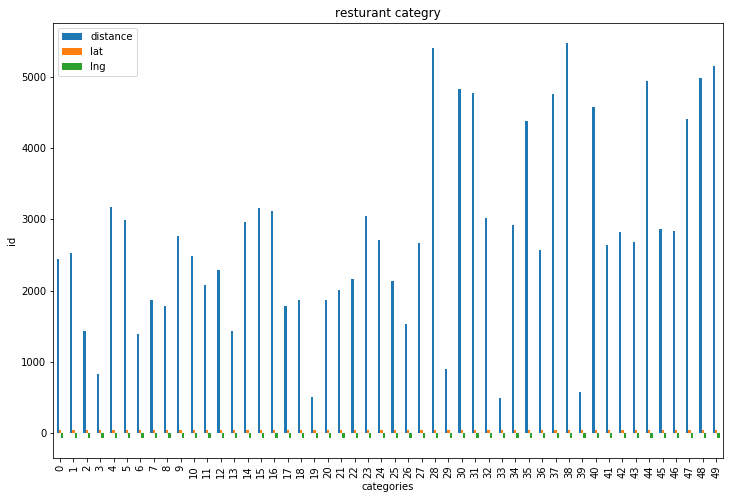

In [36]:
dataframe1_filtered.plot(kind='bar', figsize=(12, 8))

plt.xlabel('categories') # add to x-label to the plot
plt.ylabel('id') # add y-label to the plot
plt.title('resturant categry') # add title to the plot

plt.show()

In [37]:
df=dataframe1_filtered[['categories','id']]
df

,categories,id
0,Chinese Restaurant,4f844c6fe4b0059705cb042c
1,Chinese Restaurant,4a1175a1f964a52018771fe3
2,Korean Restaurant,4bd3578041b9ef3b05f0ffe5
3,Indian Restaurant,4c60797a90b2c9b648e03c22
4,Chinese Restaurant,4a1845c8f964a52092791fe3
5,Dim Sum Restaurant,59ecbd4ce97dfb5a1b7e2fd8
6,Shanghai Restaurant,59864979e96d0c565390515c
7,Korean Restaurant,51c612d9498e52a02241e27b
8,Vietnamese Restaurant,4b3955c8f964a520da5a25e3
9,Chinese Restaurant,55a04fb7498e18131da5d46e


In [38]:
df.groupby('categories').count()

,id
categories,
Asian Restaurant,3
Chinese Restaurant,16
Dim Sum Restaurant,1
Food,1
Hotel Bar,1
Indian Restaurant,2
Italian Restaurant,3
Japanese Restaurant,1
Kitchen Supply Store,1


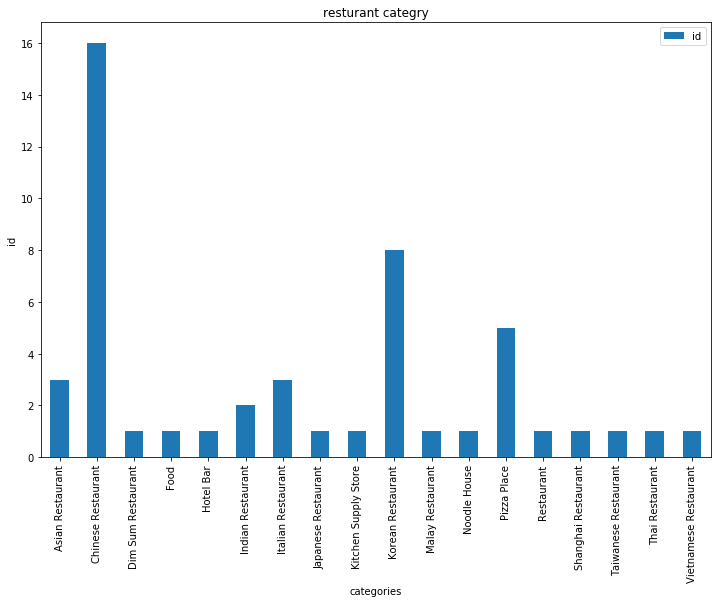

In [39]:
df.groupby('categories').count().plot(kind='bar', figsize=(12, 8))
plt.xlabel('categories') # add to x-label to the plot
plt.ylabel('id') # add y-label to the plot
plt.title('resturant categry') # add title to the plot
plt.show()

In [40]:
#Explore trending Venues 
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results2 = requests.get(url).json()
results2

{'meta': {'code': 200, 'requestId': '5e0d602f60ba08001bb32ddf'},
 'response': {'venues': []}}

In [41]:
#Check if any venue is trending during Lunch Time on Weekday
if len(results2['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results2['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [42]:
# display trending venues
trending_venues_df

'No trending venues are available at the moment!'